In [13]:
# Bonus Analysis

# Pandas
import pandas as pd
#import matplotlib.pyplot as plt

# SQL Alchemy Library
import sqlalchemy
from sqlalchemy import create_engine

from config import credentials


In [14]:
# Create the connection engine

connection_string = f"postgresql://{credentials}@localhost:5432/hp_employees_db"  

engine = create_engine(connection_string)
    
connection = engine.connect()


In [15]:
# Query the database as test and turn into pandas dataframe

salaries_table_query = "Select * from salaries"

salaries_table_df = pd.read_sql(salaries_table_query, connection)
salaries_table_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

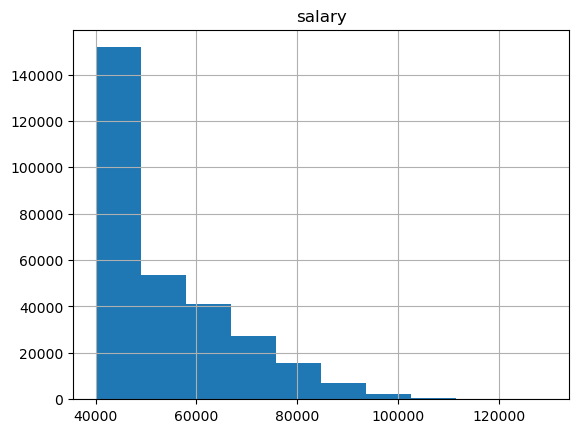

In [16]:
# Historgram of Salaries

salaries_table_df.hist(column='salary')

<AxesSubplot:title={'center':'Salary Comparison'}, xlabel='title', ylabel='salary'>

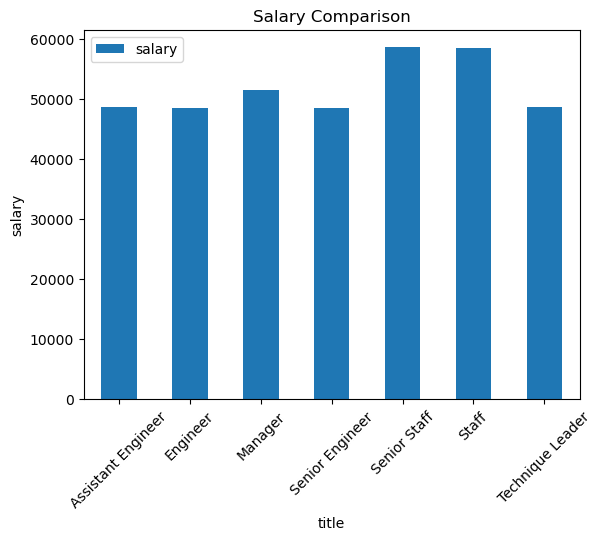

In [17]:
# Bar chart of average salary by title

avg_salary_by_title_query = "Select t.title, s.salary From employees emp\
	Inner Join title t ON emp.emp_title_id = t.title_id\
	Inner Join salaries s ON emp.emp_no = s.emp_no"

salary_by_title_df = pd.read_sql(avg_salary_by_title_query, connection) 
#salary_by_title_df.head()

salary_by_title_groupby = salary_by_title_df.groupby(["title"]).mean() ["salary"]

salary_by_title_groupby.plot(kind="bar", ylabel = "salary", title="Salary Comparison", rot=45, legend=True)
